In [1]:
import pandas as pd

### `Q-1:` Write a program to create an empty series.

In [3]:
pd.Series()

Series([], dtype: object)

##### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [6]:
# code here
x = pd.Series([10, 20, 30, 40, 50])
y = pd.Series([1, 2, 3, 4, 5])
print( x+ y)
print(x - y)
print(x * y)
print(x / y)

0    11
1    22
2    33
3    44
4    55
dtype: int64
0     9
1    18
2    27
3    36
4    45
dtype: int64
0     10
1     40
2     90
3    160
4    250
dtype: int64
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
dtype: float64


##### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [7]:
# code here
a = pd.Series([2, 4, 6, 8, 10])
b = pd.Series([1, 3, 5, 7, 10])

print(a==b)
print(a<b)
print(a>b)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


##### `Q-4.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [10]:
def change_dtype(series):
    return pd.to_numeric(series, errors = 'coerce')

series = pd.Series([1,2,'Python', 2.0, True, 100])
change_dtype(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

In [ ]:
# just checking
# code here
def change_dtype(series, dtype):
    return series.astype(dtype)

series = pd.Series([1,2.0, True, 100])
converted_series = change_dtype(series, float)
print(converted_series)

0      1.0
1      2.0
2      1.0
3    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

#### `Q-5` Find top 10 most run getter from the series.

In [17]:
# code here
data = pd.read_csv('batsman_runs_series.csv')
data


,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [19]:
data.sort_values('batsman_run',ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


##### `Q-6` No of players having runs above 3000

In [20]:
# code here
data[data['batsman_run'] > 3000].shape[0]

20

##### `Q-7` No of players having runs above mean value?

In [26]:
print(data['batsman_run'].mean())

464.42809917355373


In [22]:
data[data['batsman_run'] > data['batsman_run'].mean()].shape[0]

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



##### `Q-8`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [29]:
data2 = pd.read_csv('items.csv')
data2

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
...,...,...
4617,Steak Burrito,$11.75
4618,Steak Burrito,$11.75
4619,Chicken Salad Bowl,$11.25
4620,Chicken Salad Bowl,$8.75


In [30]:
# code here

data2= pd.read_csv("items.csv", index_col = ['item_name']).squeeze("columns")
data2

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [32]:
print(data2.isnull().sum())

50


In [39]:
def rupees(x):
    try:
        y = x[1:]
    except:
        # Sometimes Dollar sign is not there which throws an exception 
        y = x
    return float(y)*88.72

data2.apply(rupees)

item_name
Chips and Fresh Tomato Salsa              212.0408
Izze                                      300.7608
Nantucket Nectar                          300.7608
Chips and Tomatillo-Green Chili Salsa     212.0408
Chicken Bowl                             1506.4656
                                           ...    
Steak Burrito                            1042.4600
Steak Burrito                            1042.4600
Chicken Salad Bowl                        998.1000
Chicken Salad Bowl                        776.3000
Chicken Salad Bowl                        776.3000
Name: item_price, Length: 4622, dtype: float64

In [42]:
items = data2.apply(rupees)
items

item_name
Chips and Fresh Tomato Salsa              212.0408
Izze                                      300.7608
Nantucket Nectar                          300.7608
Chips and Tomatillo-Green Chili Salsa     212.0408
Chicken Bowl                             1506.4656
                                           ...    
Steak Burrito                            1042.4600
Steak Burrito                            1042.4600
Chicken Salad Bowl                        998.1000
Chicken Salad Bowl                        776.3000
Chicken Salad Bowl                        776.3000
Name: item_price, Length: 4622, dtype: float64

In [ ]:
items.astype('float')


item_name
Chips and Fresh Tomato Salsa              212.0408
Izze                                      300.7608
Nantucket Nectar                          300.7608
Chips and Tomatillo-Green Chili Salsa     212.0408
Chicken Bowl                             1506.4656
                                           ...    
Steak Burrito                            1042.4600
Steak Burrito                            1042.4600
Chicken Salad Bowl                        998.1000
Chicken Salad Bowl                        776.3000
Chicken Salad Bowl                        776.3000
Name: item_price, Length: 4622, dtype: float64

In [44]:
items.info()

<class 'pandas.core.series.Series'>
Index: 4622 entries, Chips and Fresh Tomato Salsa to Chicken Salad Bowl
Series name: item_price
Non-Null Count  Dtype  
--------------  -----  
4572 non-null   float64
dtypes: float64(1)
memory usage: 201.3+ KB


In [50]:
df = items.fillna(items.mean())

In [51]:
print(df.isna().sum())

0


In [54]:
df

item_name
Chips and Fresh Tomato Salsa              212.0408
Izze                                      300.7608
Nantucket Nectar                          300.7608
Chips and Tomatillo-Green Chili Salsa     212.0408
Chicken Bowl                             1506.4656
                                           ...    
Steak Burrito                            1042.4600
Steak Burrito                            1042.4600
Chicken Salad Bowl                        998.1000
Chicken Salad Bowl                        776.3000
Chicken Salad Bowl                        776.3000
Name: item_price, Length: 4622, dtype: float64

In [ ]:
# i. Read CSV file making 'item_name' as index
df = pd.read_csv('items.csv', index_col='item_name')

# ii. Show number of NaN values
print("NaN values in each column:\n", df.isna().sum())

# iii. Convert item price from $ to rupees (assume 1 USD = 83 INR)
# remove '$' and convert to float
df['item_price'] = df['item_price'].str.replace('$', '').astype(float) * 83

# iv. Fill NaN with mean of the series
df['item_price'].fillna(df['item_price'].mean(), inplace=True)

print(df.head())


##### `Q-9`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [55]:
# code here
print(df.mean())

662.1201543307086


In [57]:
print(df.quantile([0.25, 0.3, 0.06]))

0.25    345.1208
0.30    394.8040
0.06    110.9000
Name: item_price, dtype: float64


<Axes: ylabel='Frequency'>

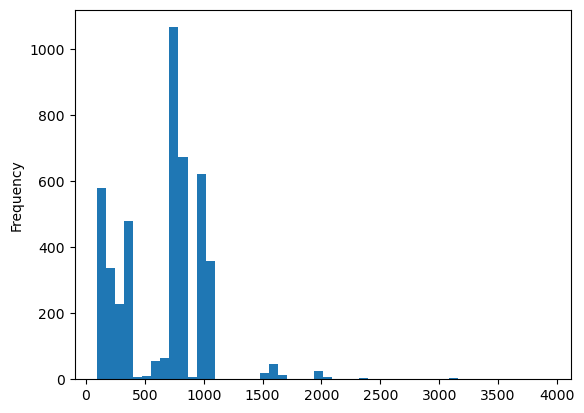

In [58]:
df.plot.hist(bins= 50)

In [60]:
s = df[(df>1000) & (df<2000)]
s

item_name
Chicken Bowl     1506.4656
Steak Burrito    1042.4600
Barbacoa Bowl    1042.4600
Steak Burrito    1042.4600
Barbacoa Bowl    1042.4600
                   ...    
Barbacoa Bowl    1042.4600
Steak Burrito    1042.4600
Steak Burrito    1042.4600
Steak Burrito    1042.4600
Steak Burrito    1042.4600
Name: item_price, Length: 469, dtype: float64

In [62]:
print(s.count())

469
